# KLASIFIKASI OBAT UNTUK PENDERITA GANGGUAN MENTAL MENGGUNAKAN MODEL 1D-CONVNET

NAMA : GRACIA RIZKA PASFICA

NIM :19104064

KELAS : S1-SE-03A

DATASET : https://docs.google.com/spreadsheets/d/1VMSM2jFxILFFD7caslWVoRICiwAIwXJ3/edit?usp=sharing&ouid=113750500476101068176&rtpof=true&sd=true

### LIBRARY

In [1]:
from nltk.corpus import stopwords # menghapus kata yang tidak memiliki makna
from sklearn.preprocessing import LabelEncoder # menyandikan variabel dalam bentuk numerik
from sklearn.model_selection import train_test_split # membagi dataset menjadi data latih dan data uji
from sklearn import metrics # mengevaluasi kinerja model machine learning
from sklearn.naive_bayes import MultinomialNB # mengklasifikasikan data menggunakan Multinomial Naive Bayes
from keras import layers # menyediakan satu set lapisan jaringan saraf untuk membangun model
from keras import models # mendifinisikan, melatih, dan mengompilasi model
from keras.callbacks import EarlyStopping # menghentikan pelatihan model 
from keras.preprocessing.text import Tokenizer # mengubah daftar teks menjadi daftar bilangan bulat
from tensorflow.keras.preprocessing.sequence import pad_sequences # melapisi urutan dengan panjang yang sama
from collections import Counter # menghitung kemunculan item dalam daftar
from sklearn.metrics import confusion_matrix # menghitung evaluasi model menggunakan confusion matrix
from sklearn.metrics import accuracy_score, classification_report # menghitung akurasi menggunakan metrics
from sklearn.preprocessing import MinMaxScaler # menskalakan data dalam rentang tertentu
from sklearn.metrics import precision_score, recall_score, f1_score, average_precision_score # membuat confusion matrix
from keras.models import Sequential # membuat model Sequential
from keras.layers import Dense, Conv1D, Flatten, MaxPooling1D, Dropout, LeakyReLU # membuat layer pada pemodelan 1DConvnet

import seaborn as sns # visualisasi data berbasis matplotlib
import numpy as np # melakukan operasi aritmatika
import pandas as pd # menyediakan fungsi untuk manipulasi data 
import matplotlib.pyplot as plt # visualisasi data dalam bentuk plot dan bagan
import scikitplot as skplt # visualisasi hasil model
import wordcloud # meng-generate hasil akhir berupa objek
import re # memeriksa apakah string berisi pola pencarian yang ditentukan
import string # mengolah string
import os # menyediakan fungsi untuk berinteraksi dengan sistem operasi
import nltk # membersihkan, memproses, membangun, dan melatih model teks

### DATASET PREPARATION

In [2]:
# IMPORT DATASET

dataset = "E:\Kuliah\Skripsi\Lanjut Sidang\Dataset Fiks" # memanggil dataset

In [3]:
# IDENTIFIKASI FOLDER

ssri_dataset = dataset +"/"+ "ssri" # variabel untuk menyimpan folder ssri
atipikal_dataset = dataset +"/"+ "atipikal" # variabel untuk menyimpan folder atipikal

ssri_filenames = os.listdir(ssri_dataset) # membaca dan menyimpan seluruh file pada folder ssri
atipikal_filenames = os.listdir(atipikal_dataset) # membaca dan menyimpan seluruh file pada folder atipikal

Function load_text berguna untuk membuka file yang tersimpan di dalam path menggunakan function open(), kemudian membaca isi file menggunakan function read(), lalu menutup file tersebut menggunakan function close() dan mengembalikannya dalam bentuk string.

path adalah istilah yang digunakan untuk menunjukkan alamat dari sebuah file.

In [4]:
# MEMBACA FILE

def load_text(path): # Function untuk memuat teks yang ada pada file
    file = open(path,"r") # Membuka file
    x_data = file.read() # Membaca file yang dibuka
    file.close() # Menutup file yang telah dibuka
    return x_data # Hasil keluaran dari function load_text

def load_data(path): # Function untuk menginisiasi function load_text
    return load_text(path) # Hasil keluaran dari function load_data

Function get_data() berfungsi untuk memuat data dari kumpulan file dan mengembalikan data - data tersebut menjadi dua daftar terpisah yakni x dan y.

In [5]:
# MEMBUAT DATA INDEPENDEN (x) DAN DEPENDEN (y)

def get_data(folder_path, file_names, y_data): # Function untuk mendapatkan data 
    # Inisiasi variable dengan tipe data list
    x = list() # Variable independen 
    y = list() # Variable dependen (label)
    # Looping menambahkan file yang ada pada folder SSRI dan atipikal
    for i in file_names:
        full_path = folder_path + "/" + i # Variable full_path berisikan folder dengan indeks ke-i
        x_data = load_data(path = full_path) # Variable readfile akan membaca dan memuat seluruh file pada folder
        x.append(x_data) # Menambahkan file yang telah dibaca
        y.append(y_data) # Menambahkan kategori berdasarkan variable data
    return x, y # Hasil keluaran dari function get_data_target

In [6]:
# INISIASI DATA SSRI

ssri_x, ssri_y = get_data(
    folder_path = ssri_dataset, # menyimpan data folder dari variabel ssri_dataset
    file_names = ssri_filenames, # menyimpan data file dari variabel ssri_filenames
    y_data = "ssri" # memberi label ssri pada ssri_data dan ssri_target 
) 

In [7]:
# INISIASI DATA ATIPIKAL

atipikal_x, atipikal_y = get_data(
    folder_path = atipikal_dataset, # menyimpan data folder dari variabel ssri_dataset
    file_names = atipikal_filenames, # menyimpan data file dari variabel ssri_filenames
    y_data = "atipikal" # memberi label ssri pada ssri_data dan ssri_target 
)

In [8]:
# MENGGABUNGKAN DATA SSRI DAN ATIPIKAL

x = ssri_x + atipikal_x # variabel untuk menyimpan data fitur
y = ssri_y + atipikal_y # variabel untuk menyimpan data label

### EXPLORATORY DATA ANALYSIS

In [9]:
print(os.listdir(dataset)) # mengembalikan daftar nama file dan direktori di direktori yang ditentukan oleh parameter

['atipikal', 'ssri']


In [10]:
# Mengetahui jenis tipe data

print("="*5,"SEBELUM DITAMBAHKAN KE DALAM VARIABEL X DAN Y","="*5)
print("")
print("Tipe data SSRI     :",type(ssri_dataset)) # mengetahui jenis tipe data pada kelompok obat SSRI
print("Tipe data atipikal :",type(atipikal_dataset)) # mengetahui jenis tipe data pada kelompok obat atipikal
print("\n\n")
print("="*5,"SETELAH DITAMBAHKAN KE DALAM VARIABEL X DAN Y","="*5)
print("")
print("Tipe data variabel x :",type(x)) # mengetahui jenis tipe data pada variabel x
print("Tipe data variabel y :",type(y)) # mengetahui jenis tipe data pada variabel y

===== SEBELUM DITAMBAHKAN KE DALAM VARIABEL X DAN Y =====

Tipe data SSRI     : <class 'str'>
Tipe data atipikal : <class 'str'>



===== SETELAH DITAMBAHKAN KE DALAM VARIABEL X DAN Y =====

Tipe data variabel x : <class 'list'>
Tipe data variabel y : <class 'list'>


In [11]:
# MENAMPILKAN DATA SSRI

print(get_data(
    folder_path = ssri_dataset, 
    file_names = ssri_filenames, 
    y_data='ssri'
))

(['Citalopram Hydrobromide 10 mg bottle ( Mayor Depressive Disorder , Bipolar Disorder , Obsessive Compulsif Disorder , Depression , Generalized Anxiety Disorder , Social Anxiety Disorder, Borderline Personality Disorder )\n\n\n', 'citalopram hbr 10 mg tablet ( mayor depressive disorder , bipolar disorder , obsessive compulsif disorder , depression , generalized anxiety disorder , social anxiety disorder , borderline personality disorder )\n', 'stccc - fluoxetine 20 mg capsule ( mayor depressive disorder , panic disorder , obsessive compulsive disorder , depression )', 'selfemra 10 mg capsule ( mayor depressive disorder , panic disorder , obsessive compulsive disorder , depression )', 'selfemra 20 mg capsule ( mayor depressive disorder , panic disorder , obsessive compulsive disorder , depression )', 'sandoz fluoxetine 10 mg capsule ( mayor depressive disorder , panic disorder , obsessive compulsive disorder , depression )', 'sandoz fluoxetine 20 mg capsule ( mayor depressive disorder 

In [12]:
# MENAMPILKAN DATA ATIPIKAL

print(get_data(
    folder_path = atipikal_dataset, 
    file_names = atipikal_filenames, 
    y_data='atipikal'
))

(['Apo - Aripiprazole 20 mg Tablet ( Schizophrenia , Tourette Disorder , Mayor Depressive Disorder , Bipolar Disorder , Depression )', 'aripiprazole 20 mg tablet ( schizophrenia , tourette disorder , mayor depressive disorder , bipolar disorder , depression )\n', 'latuda seventy 4 mg tablet ( schizophrenia , bipolar disorder , depression )', 'latuda 19 mg tablet ( schizophrenia , bipolar disorder , depression )', 'latuda 80 mg tablet ( schizophrenia , bipolar disorder , depression )', 'latuda 120 mg tablet ( schizophrenia , bipolar disorder , depression )', 'latuda 37 mg tablet ( schizophrenia , bipolar disorder , depression )', 'latuda 74 mg tablet ( schizophrenia , bipolar disorder , depression )', 'latuda 60 mg tablet ( schizophrenia , bipolar disorder , depression )', 'haldol 5 mg injection ( schizophrenia , tourette disorder , obsessive compulsive disorder )', 'haldol decanoate 50 mg injection ( schizophrenia , tourette disorder , obsessive compulsive disorder )', 'haldol decanoat

In [13]:
# MENGHTIUNG TOTAL DATA SSRI

print("SSRI data ...")
print("Total data fitur (x) SSRI: ",len(ssri_x)) 
print("Total data label (y) SSRI: ",len(ssri_y))

SSRI data ...
Total data fitur (x) SSRI:  275
Total data label (y) SSRI:  275


In [14]:
# MENGHTIUNG TOTAL DATA ATIPIKAL

print("Atipikal data ...")
print("Total data fitur (x) Atipikal: ",len(atipikal_x))
print("Total data label (y) Atipikal: ",len(atipikal_y))

Atipikal data ...
Total data fitur (x) Atipikal:  280
Total data label (y) Atipikal:  280


In [15]:
# MENGHITUNG KESELURUHAN DATA

print("Total data fitur  (x): ",len(x))
print("Total data target (y): ",len(y))

Total data fitur  (x):  555
Total data target (y):  555


In [16]:
# MENGETAHUI JENIS TIPE DATA

print("Tipe data variabel X adalah ", type(x))
print("Tipe data variabel y adalah ", type(y))

Tipe data variabel X adalah  <class 'list'>
Tipe data variabel y adalah  <class 'list'>


Function subplots() merupakan function yang digunakan untuk membuat gambar (fig) dan sumbu (ax).
Library yang dibutuhkan untuk memanggil function tersebut berupa matplolib.pyplot.

Argumen yang dibutuhkan untuk membuat plot batang (bar) diantaranya x_labels yg mewakili sumbu x, bar_height yg mewakili sumbu y, dan bar_colors yg mewakili warna batang.

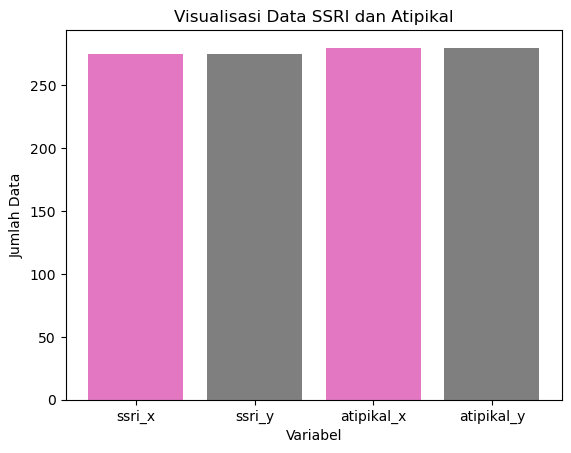

In [17]:
# VISUALISASI JUMLAH DATA SSRI DAN ATIPIKAL

# inisiasi variabel
total_ssriX = len(ssri_x) 
total_ssriY = len(ssri_y)
total_atipikalX = len(atipikal_x)
total_atipikalY = len(atipikal_y)

fig, ax = plt.subplots() 

var_x = ['ssri_x', 'ssri_y', 'atipikal_x', 'atipikal_y'] # Variabel yg mewakili label sumbu x pd plot 
var_y = [total_ssriX, total_ssriY, total_atipikalX, total_atipikalY] # Variabel yg mewakili label sumbu y pd plot
bar_colors = ['tab:pink', 'tab:grey', 'tab:pink', 'tab:grey'] # Variabel yg menyimpan warna pd setiap plot batang

ax.bar(var_x, var_y, color = bar_colors) # Membuat plot batang dg argumen untuk sumbu x, sumbu y, dan warna

ax.set_ylabel('Jumlah Data') # Membuat nama label dari sumbu y
ax.set_xlabel('Variabel') # Membuat nama label dari sumbu x
ax.set_title('Visualisasi Data SSRI dan Atipikal') # Membuat judul plot batang

plt.show() # Menampilkan hasil plot

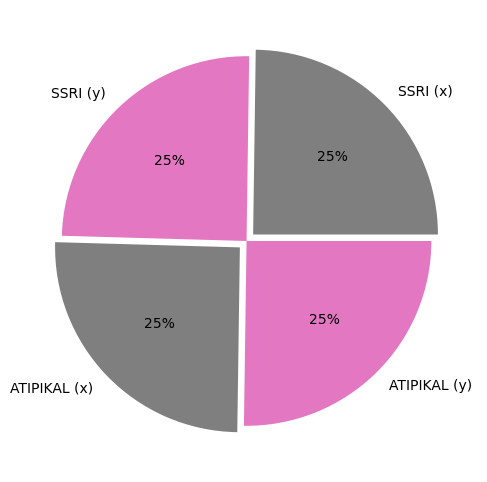

In [18]:
# VISUALISASI JUMLAH DATA ATIPIKAL DAN SSRI DALAM BENTUK D IAGRAM LINGKARAN

total_ssriX = len(ssri_x) 
total_ssriY = len(ssri_y)
total_atipikalX = len(atipikal_x)
total_atipikalY = len(atipikal_y)

count = [total_ssriX, total_ssriY, total_atipikalX, total_atipikalY]
label = ['SSRI (x)', 'SSRI (y)', 'ATIPIKAL (x)', 'ATIPIKAL (y)']
color = sns.color_palette(['tab:grey', 'tab:pink', 'tab:grey', 'tab:pink'])[0:4]
explode = (0.05, 0, 0.05, 0)

plt.figure(figsize=(6,6))
plt.pie(count, labels = label, colors= color, autopct='%1.0f%%', explode = explode)

plt.show()

### DATASET PREPROCESSING

Alasan memilih Label Encoder karena tidak perlu menambahkan data dummy seperti one hot encoding sehingga pada saat dilatih nantinya tidak banyak data bernilai kosong.

In [19]:
# Encoding Data Variabel y
le = LabelEncoder() # Function untuk mengubah data kategorikal menjadi numerik
le.fit(y) # Melatih variable y
y = le.transform(y) # Mengubah nilai variable y menjadi numerik

# Menampilkan Data Variabel y
print("="*29,"KETERANGAN DATA","="*28)
print("Atipikal : 0")
print("SSRI     : 1")
print("="*74)
print("Setelah diencoding ...")
print(y)

============================= KETERANGAN DATA ============================
Atipikal : 0
SSRI     : 1
Setelah diencoding ...
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

In [20]:
# CLASS UNTUK MENGUBAH NILAI MENJADI HURUF KECIL

class LowerText:
    def process(self, text):
        return text.lower() # mengembalikan nilai menjadi huruf kecil

In [21]:
print("="*27,"SEBELUM LOWER TEXT","="*28,"\n", x[0])
print("="*27,"SESUDAH LOWER TEXT","="*28,"\n", LowerText.process(x[0], text = x[0]))

=========================== SEBELUM LOWER TEXT ============================ 
 Citalopram Hydrobromide 10 mg bottle ( Mayor Depressive Disorder , Bipolar Disorder , Obsessive Compulsif Disorder , Depression , Generalized Anxiety Disorder , Social Anxiety Disorder, Borderline Personality Disorder )



=========================== SESUDAH LOWER TEXT ============================ 
 citalopram hydrobromide 10 mg bottle ( mayor depressive disorder , bipolar disorder , obsessive compulsif disorder , depression , generalized anxiety disorder , social anxiety disorder, borderline personality disorder )





In [22]:
# CLASS UNTUK MEMISAHKAN KATA DALAM KALIMAT

class VectorizeText:
    def __init__(self):
        pass
    def process(self, text):
        return text.split() # memisahkan string menggunakan delimiter koma(,)

In [23]:
# Exploratory Data

print("="*20,"SEBELUM TEXT DIPISAHKAN PER KATA","="*25,"\n", x[0])
print("="*20,"SESUDAH TEXT DIPISAHKAN PER KATA","="*25,"\n", VectorizeText.process(x[0], text = x[0]))

==================== SEBELUM TEXT DIPISAHKAN PER KATA ========================= 
 Citalopram Hydrobromide 10 mg bottle ( Mayor Depressive Disorder , Bipolar Disorder , Obsessive Compulsif Disorder , Depression , Generalized Anxiety Disorder , Social Anxiety Disorder, Borderline Personality Disorder )



==================== SESUDAH TEXT DIPISAHKAN PER KATA ========================= 
 ['Citalopram', 'Hydrobromide', '10', 'mg', 'bottle', '(', 'Mayor', 'Depressive', 'Disorder', ',', 'Bipolar', 'Disorder', ',', 'Obsessive', 'Compulsif', 'Disorder', ',', 'Depression', ',', 'Generalized', 'Anxiety', 'Disorder', ',', 'Social', 'Anxiety', 'Disorder,', 'Borderline', 'Personality', 'Disorder', ')']


In [24]:
# CLASS UNTUK MENYARING TANDA BACA

class FilterPunctuation:
    def process(self, text):
        reg_exp = re.compile("[%s]"%re.escape(string.punctuation))
        text = [reg_exp.sub("", word) for word in text] 
        return text
    
# re.compile : mengkompilasi string menjadi objek pola ekspresi reguler
# re.escape  : melepaskan karakter khusus yang ada pada string.punctuation
# .sub()     : mencari dan mengganti karakter tanda baca apa pun dalam string dengan string kosong

In [25]:
print("="*20,"SEBELUM PENYARINGAN TANDA BACA","="*25,"\n", x[0])
print("="*20,"SETELAH PENYARINGAN TANDA BACA","="*25,"\n", FilterPunctuation.process(x[0], text = x[0]))

==================== SEBELUM PENYARINGAN TANDA BACA ========================= 
 Citalopram Hydrobromide 10 mg bottle ( Mayor Depressive Disorder , Bipolar Disorder , Obsessive Compulsif Disorder , Depression , Generalized Anxiety Disorder , Social Anxiety Disorder, Borderline Personality Disorder )



==================== SETELAH PENYARINGAN TANDA BACA ========================= 
 ['C', 'i', 't', 'a', 'l', 'o', 'p', 'r', 'a', 'm', ' ', 'H', 'y', 'd', 'r', 'o', 'b', 'r', 'o', 'm', 'i', 'd', 'e', ' ', '1', '0', ' ', 'm', 'g', ' ', 'b', 'o', 't', 't', 'l', 'e', ' ', '', ' ', 'M', 'a', 'y', 'o', 'r', ' ', 'D', 'e', 'p', 'r', 'e', 's', 's', 'i', 'v', 'e', ' ', 'D', 'i', 's', 'o', 'r', 'd', 'e', 'r', ' ', '', ' ', 'B', 'i', 'p', 'o', 'l', 'a', 'r', ' ', 'D', 'i', 's', 'o', 'r', 'd', 'e', 'r', ' ', '', ' ', 'O', 'b', 's', 'e', 's', 's', 'i', 'v', 'e', ' ', 'C', 'o', 'm', 'p', 'u', 'l', 's', 'i', 'f', ' ', 'D', 'i', 's', 'o', 'r', 'd', 'e', 'r', ' ', '', ' ', 'D', 'e', 'p', 'r', 'e', 's', 's', 

In [26]:
# CLASS UNTUK MENYARING NON ALPHABET

class FilterNonAlpha:
    def process(self, text):
        text = [word for word in text if word.isalpha()] # membuat daftar string baru yg hanya terdiri abjad
        return text

In [27]:
print("="*20,"SEBELUM PENYARINGAN NON ALPHABET","="*25,"\n", x[0])
print("\n")
print("="*20,"SESUDAH PENYARINGAN NON ALPHABET","="*25,"\n", FilterNonAlpha.process(x[0], text = x[0]))

==================== SEBELUM PENYARINGAN NON ALPHABET ========================= 
 Citalopram Hydrobromide 10 mg bottle ( Mayor Depressive Disorder , Bipolar Disorder , Obsessive Compulsif Disorder , Depression , Generalized Anxiety Disorder , Social Anxiety Disorder, Borderline Personality Disorder )





==================== SESUDAH PENYARINGAN NON ALPHABET ========================= 
 ['C', 'i', 't', 'a', 'l', 'o', 'p', 'r', 'a', 'm', 'H', 'y', 'd', 'r', 'o', 'b', 'r', 'o', 'm', 'i', 'd', 'e', 'm', 'g', 'b', 'o', 't', 't', 'l', 'e', 'M', 'a', 'y', 'o', 'r', 'D', 'e', 'p', 'r', 'e', 's', 's', 'i', 'v', 'e', 'D', 'i', 's', 'o', 'r', 'd', 'e', 'r', 'B', 'i', 'p', 'o', 'l', 'a', 'r', 'D', 'i', 's', 'o', 'r', 'd', 'e', 'r', 'O', 'b', 's', 'e', 's', 's', 'i', 'v', 'e', 'C', 'o', 'm', 'p', 'u', 'l', 's', 'i', 'f', 'D', 'i', 's', 'o', 'r', 'd', 'e', 'r', 'D', 'e', 'p', 'r', 'e', 's', 's', 'i', 'o', 'n', 'G', 'e', 'n', 'e', 'r', 'a', 'l', 'i', 'z', 'e', 'd', 'A', 'n', 'x', 'i', 'e', 't', 'y', 

In [28]:
# CLASS UNTUK TEXT PREPROCESSING

# Class untuk menggabungkan seluruh tahapan preprocessing
class TempProcess:
    def __init__(self, process_list):
        self.process_list = process_list # daftar text preprocessing yang disatukan
    def process(self, text):
        for process in self.process_list:
            text = process.process(text) # memproses seluruh list text preprocessing yg disimpan dalam satu variabel
        return text

In [29]:
# MENGGABUNGKAN SELURUH TEXT PREPROCESSING MENJADI SATU

lowerText = LowerText()
vecText = VectorizeText()
filterPunct = FilterPunctuation()
filterNona = FilterNonAlpha()

TextPreprocessing = [lowerText,
                     vecText,
                     filterPunct,
                     filterNona
                    ]

TextPreprocessingResult = TempProcess(process_list = TextPreprocessing)

In [30]:
textPreprocessing_ = TextPreprocessingResult.process(x[0])
print("Contoh data yang telah dilakukan text preprocessing ... \n", textPreprocessing_)

Contoh data yang telah dilakukan text preprocessing ... 
 ['citalopram', 'hydrobromide', 'mg', 'bottle', 'mayor', 'depressive', 'disorder', 'bipolar', 'disorder', 'obsessive', 'compulsif', 'disorder', 'depression', 'generalized', 'anxiety', 'disorder', 'social', 'anxiety', 'disorder', 'borderline', 'personality', 'disorder']


In [31]:
# Memproses data satu per satu 
def process_text(texts, textProcess):
    process_texts=list()
    for text in texts:
        process_text = textProcess.process(text)
        process_texts.append(process_text)
    return process_texts

In [32]:
# TRAIN / TEST SPLIT

X_train, X_test, y_train, y_test = train_test_split(
    x,
    y,
    test_size = 0.3,
    stratify = y,
    random_state = 24)

print("Membagi dataset ke dalam data latih dan data uji ...")
print("Panjang ukuran data latih (x) :",len(X_train))
print("Panjang ukuran data latih (y) :",len(y_train))
print("Panjang ukuran data uji   (x) :",len(X_test))
print("Panjang ukuran data uji   (y) :",len(y_test))

Membagi dataset ke dalam data latih dan data uji ...
Panjang ukuran data latih (x) : 388
Panjang ukuran data latih (y) : 388
Panjang ukuran data uji   (x) : 167
Panjang ukuran data uji   (y) : 167


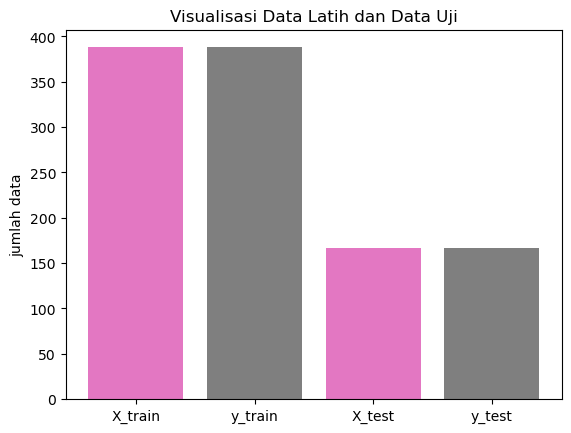

In [33]:
# Visualisasi data latih dan data uji

total_xTrain = len(X_train)
total_yTrain = len(y_train)
total_xTest = len(X_test)
total_yTest = len(y_test)

fig, ax = plt.subplots() 

var_x = ['X_train', 'y_train', 'X_test', 'y_test']
counts = [total_xTrain, total_yTrain, total_xTest, total_yTest]
bar_colors = ['tab:pink', 'tab:grey', 'tab:pink', 'tab:grey']

ax.bar(var_x, counts, color = bar_colors)

ax.set_ylabel('jumlah data')
ax.set_title('Visualisasi Data Latih dan Data Uji')

plt.show()

In [34]:
X_train_process = process_text(texts = X_train, textProcess = TextPreprocessingResult)
print("X_train processed...")

X_train processed...


In [35]:
X_test_process = process_text(texts = X_test, textProcess = TextPreprocessingResult)
print("X_test processed...")

X_test processed...


Function Tokenizer() membutuhkan library berupa keras.preprocessing.text pada modul Tokenizer

Function fit_on_texts adalah proses menyesuaikan token pada teks dengan cara membangun kosakata (yang telah dipisahkan pada proses Tokenizer) kemudian menentukan frekuensi dari setiap token.

Function texts_to_sequences adalah proses mengubah teks menjadi bilangan bulat. Bilangan bulat yang digunakan adalah bilangan frekuensi yang telah ditentukan pada saat fit_on_texts.

Function pad_sequences adalah proses menambahkan angka nol sesuai jumlah yang kurang pada kalimat supaya seluruh teks memiliki jumlah bilangan yang sama pada setiap kalimatnya. Pad_sequences memiliki 3 argumen diantaranya data yang ingin ditambahkan nol, ukuran maksimal data supaya jumlah nolnya bisa menyesuaikan, dan padding untuk meletakkan nol. 

Padding pada pad_sequences terbagi menjadi dua jenis diantaranya pre yaitu untuk meletakkan nol di awal dan post untuk meletakkan nol di akhir.

In [36]:
def tokenizer(texts):
    tokenizer = Tokenizer() # memisahkan teks untuk diubah menjadi token
    tokenizer.fit_on_texts(texts) # proses menyesuaikan token pada teks
    return tokenizer

In [37]:
def encode_text(tokenizer, max_length, texts):
    encoded = tokenizer.texts_to_sequences(texts) # mengubah teks menjadi bilangan bulat
    padded = pad_sequences(encoded, maxlen = max_length, padding = "post") # menambahkan angka nol di akhir data encode
    return padded

In [38]:
tokenizer = tokenizer(texts = X_train) # melakukan proses tokenizer
vocab_size = len(tokenizer.word_index) + 1 # menghitung keseluruhan kata unik yang dijadikan tokenisasi
print("Vocabulary size:", vocab_size)

Vocabulary size: 172


Proses perhitungan max_length adalah dengan cara memisahkan setiap baris dengan menggunakan spasi putih kemudian dari keseluruhan data latih dicari ukuran data terpanjang dan disimpan pada variabel max_length.

In [39]:
max_length = max([len(row.split()) for row in X_train]) # menghitung ukuran data terpanjang
print("Maximum length:", max_length)

Maximum length: 32


In [40]:
X_train_encoded = encode_text(tokenizer, max_length, X_train_process) # proses mengkodekan data latih
X_test_encoded = encode_text(tokenizer, max_length, X_test_process) # proses mengkodekan data uji

In [41]:
print("X_train encoded...")
print("X_test encoded...")

X_train encoded...
X_test encoded...


In [42]:
print("="*26,"SEBELUM DATA DI ENCODE","="*26,"\n", TextPreprocessingResult.process(X_train[0]))
print("\n")
print("="*26,"SETELAH DATA DI ENCODE","="*26,"\n",X_train_encoded[0])

========================== SEBELUM DATA DI ENCODE ========================== 
 ['pexeva', 'mg', 'tablet', 'mayor', 'depressive', 'disorder', 'panic', 'disorder', 'obsessive', 'compulsive', 'disorder', 'generalized', 'anxiety', 'disorder', 'social', 'anxiety', 'disorder']


========================== SETELAH DATA DI ENCODE ========================== 
 [94  2  6  4  3  1 13  1  9 11  1 14  5  1 12  5  1  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0]


### PELATIHAN MODEL 

In [43]:
def create_model(vocab_size, max_length):
    model = models.Sequential()
    model.add(layers.Embedding(vocab_size, 100, input_length=max_length))
    model.add(layers.Conv1D(filters = 32,kernel_size = 8, activation="relu"))
    model.add(layers.MaxPooling1D(2))
    model.add(layers.Flatten())
    model.add(layers.Dense(16, activation="relu"))
    model.add(layers.Dense(1,  activation="sigmoid"))
    return model

In [44]:
embedding_model = create_model(vocab_size=vocab_size, max_length=max_length)
embedding_model.summary() # menggambarkan model yang telah dibangun

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 32, 100)           17200     
                                                                 
 conv1d (Conv1D)             (None, 25, 32)            25632     
                                                                 
 max_pooling1d (MaxPooling1D  (None, 12, 32)           0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 384)               0         
                                                                 
 dense (Dense)               (None, 16)                6160      
                                                                 
 dense_1 (Dense)             (None, 1)                 17        
                                                        

Loss merupakan parameter yang digunakan untuk menghitung kerugian ketika melatih model. Loss yang digunakan berupa binary_crossentropy karena digunakan untuk menghitung kerugian pada klasifikasi biner sedangkan category_crossentropy digunakan untuk menghitung kerugian pada klasifikasi multi class.

Optimizer merupakan algoritma pengoptimalan yang digunakan untuk memperbarui bobot model selama pelatihan. Pemilihan algoritma adam karena algoritma ini sangat populer dan cocok digunakan untuk deep learning.

Metrics merupakan daftar matriks yang digunakan untuk mengevaluasi performa model. Metrics yang digunakan berupa akurasi yakni mengukur rasio prediksi benar terhadap jumlah total prediksi pada model.

In [45]:
embedding_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [46]:
# menghentikan proses training apabila tidak ada peningkatan val_accuracy setelah satu epoch
earlyStopping = EarlyStopping(monitor="val_accuracy", patience=1)

modelHistory = embedding_model.fit(X_train_encoded, 
                                   y_train, 
                                   batch_size = 16, 
                                   validation_data = (X_test_encoded, y_test),
                                   epochs = 100, 
                                   callbacks=[earlyStopping])
print("Model trained...")

Epoch 1/100
25/25 [==============================] - 4s 42ms/step - loss: 0.5247 - accuracy: 0.8196 - val_loss: 0.3678 - val_accuracy: 0.9102
Epoch 2/100
25/25 [==============================] - 0s 14ms/step - loss: 0.2263 - accuracy: 0.9639 - val_loss: 0.0989 - val_accuracy: 0.9940
Epoch 3/100
25/25 [==============================] - 0s 13ms/step - loss: 0.0588 - accuracy: 0.9923 - val_loss: 0.0260 - val_accuracy: 0.9940
Model trained...


### AKURASI

Function evaluate() digunakan untuk mengevaluasi keakuratan model. Function ini akan mengembalikan dua nilai yang disimpan pada variabel _ dan acc. Variabel _ digunakan untuk menyimpan nilai loss dan variabel acc digunakan untuk menyimpan akurasi.

Verbose diatur ke-0 yang berarti tidak ada keluaran yang dicetak selama evaluasi

In [47]:
_, acc = embedding_model.evaluate(X_train_encoded, y_train, verbose=0)
_,acc= embedding_model.evaluate(X_test_encoded, y_test, verbose=0)

In [48]:
print("Train accuracy:{:.2f}".format(acc*100))
print("Test accuracy:{:.2f}".format(acc*100))

Train accuracy:99.40
Test accuracy:99.40


In [49]:
target_classes = ["SSRI", "Atipikal"]
predictY = embedding_model.predict(X_test_encoded, verbose=0)
print("Test Accuracy : {}".format(accuracy_score(y_test, predictY.round())*100),"%")

print("\n")
print(classification_report(
    y_test, 
    predictY.round(), 
    target_names = target_classes)
     )
print("\nConfusion Matrix : ")
print(confusion_matrix(y_test, predictY.round()))

Test Accuracy : 99.40119760479041 %


              precision    recall  f1-score   support

        SSRI       0.99      1.00      0.99        84
    Atipikal       1.00      0.99      0.99        83

    accuracy                           0.99       167
   macro avg       0.99      0.99      0.99       167
weighted avg       0.99      0.99      0.99       167


Confusion Matrix : 
[[84  0]
 [ 1 82]]


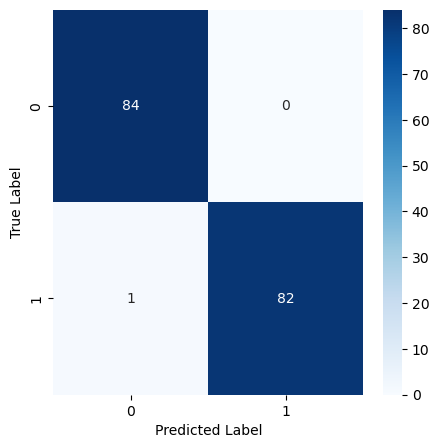

In [50]:
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(
    confusion_matrix(y_test, predictY.round()), 
    annot=True, 
    fmt=".0f", 
    ax=ax, 
    cmap="Blues"
)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

### VISUALISASI MODEL

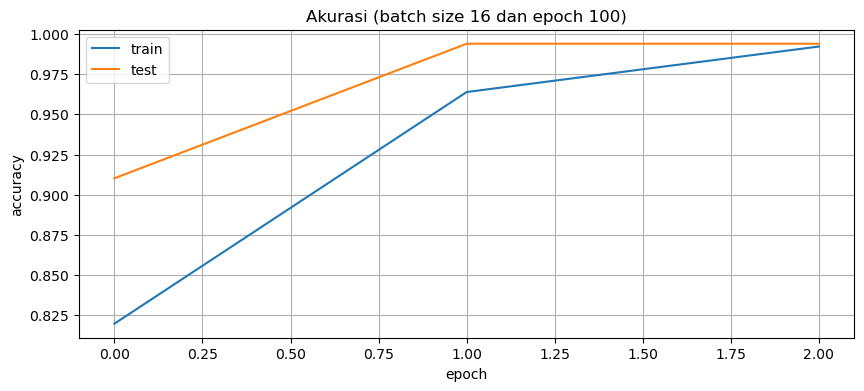

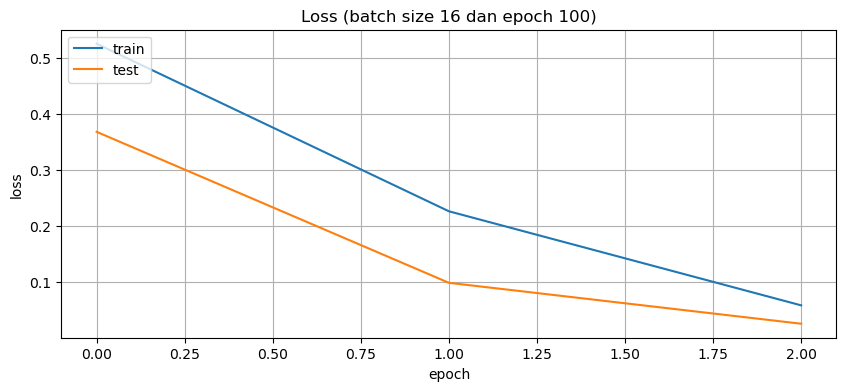

In [51]:
# Membuat plot akurasi model CNN
plt.figure(figsize=(10,4))
plt.plot(modelHistory.history['accuracy'])
plt.plot(modelHistory.history['val_accuracy'])
plt.title('Akurasi (batch size 16 dan epoch 100)')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.grid(True)
plt.show()

# Membuat plot loss model CNN
plt.figure(figsize=(10,4))
plt.plot(modelHistory.history['loss'])
plt.plot(modelHistory.history['val_loss'])
plt.title('Loss (batch size 16 dan epoch 100)')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.grid(True)
plt.show()

### CLASSIFICATION DATA TEST

In [52]:
# Prediksi menggunakan 1D - Convnet
predictions = embedding_model.predict(X_test_encoded.round())
print(predictions)

6/6 [==============================] - 0s 6ms/step
[[0.9644393 ]
 [0.00120399]
 [0.9891219 ]
 [0.01043123]
 [0.98913664]
 [0.96860677]
 [0.98914766]
 [0.01054993]
 [0.9890554 ]
 [0.00224736]
 [0.01099932]
 [0.00122666]
 [0.01173327]
 [0.01736802]
 [0.95850873]
 [0.00119893]
 [0.99020714]
 [0.00122666]
 [0.9891148 ]
 [0.98565435]
 [0.01034435]
 [0.00602341]
 [0.00546699]
 [0.0173698 ]
 [0.005222  ]
 [0.0187424 ]
 [0.01147606]
 [0.00130828]
 [0.00130828]
 [0.00546699]
 [0.00144714]
 [0.0187424 ]
 [0.083459  ]
 [0.0049289 ]
 [0.9541387 ]
 [0.00125031]
 [0.00536862]
 [0.98651785]
 [0.01147606]
 [0.9644393 ]
 [0.98913443]
 [0.00124122]
 [0.98342764]
 [0.00144714]
 [0.01673028]
 [0.990578  ]
 [0.9902857 ]
 [0.00139811]
 [0.9862508 ]
 [0.9589477 ]
 [0.0012542 ]
 [0.0089175 ]
 [0.01173327]
 [0.9644393 ]
 [0.9644393 ]
 [0.0089175 ]
 [0.0049289 ]
 [0.99030405]
 [0.00198923]
 [0.9905632 ]
 [0.07785967]
 [0.0014051 ]
 [0.00488965]
 [0.07785962]
 [0.0187424 ]
 [0.0089175 ]
 [0.00491358]
 [0.0013082

### CLASSIFICATION DATA TEST

In [53]:
preprocess = TextPreprocessingResult.process(X_test[70]) # preprocessing pada indeks array
preprocess = [" ".join(preprocess)] # menggabungkan kata - kata yang telah dipisahkan pd preprocessing 
res_preprocess = tokenizer.texts_to_sequences(preprocess) # mengubah kata menjadi numerik
result = pad_sequences(res_preprocess, max_length, padding="post") # menambahkan angka nol pd indeks array yg kosong
res_predict = embedding_model.predict(result) # melakukan prediksi model

def hasil(text):
    if res_predict.round() < 1:
        text = "Atipikal"
    else:
        text = "SSRI"
    return text

1/1 [==============================] - 0s 62ms/step


In [54]:
print("="*24,"DATA SEBELUM DI PREPROCESSING","="*24)
print("\n", X_test[70])
print("")
print("="*24,"DATA SETELAH DI PREPROCESSING","="*24)
print("\n",result)
print("")
print("="*31,"HASIL PREDIKSI","="*32)
print(res_predict.round(), " atau ", hasil(res_predict))

======================== DATA SEBELUM DI PREPROCESSING ========================

 ach - floxetine 20 mg capsule ( mayor depressive disorder , panic disorder , obsessive compulsive disorder , depression )

======================== DATA SETELAH DI PREPROCESSING ========================

 [[170   2  15   4   3   1  13   1   9  11   1   8   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0]]

=============================== HASIL PREDIKSI ================================
[[1.]]  atau  SSRI


### CLASSIFICATION NEW DATA

In [71]:
text = "Lustral capsule 25 mg ( Binge Eating Disorder, Bulimia Nervosa, Mayor Depressive Disorder, Panic Disorder, Obsessive Compulsive Disorder, General Anxiety Disorder, Social Anxiety Disorder, Post Traumatic Stress Disorder, Premenstrual Dysphoric Disorder)"
preprocess_new = TextPreprocessingResult.process(text)
preprocess_new = [" ".join(preprocess_new)]
res_preprocess_new = tokenizer.texts_to_sequences(preprocess_new)
result_new = pad_sequences(res_preprocess_new, max_length, padding="post")
res_predict_new = embedding_model.predict(result_new)

def hasil_new(text):
    if res_predict_new.round() < 1:
        text = "Atipikal"
    else:
        text = "SSRI"
    return text

1/1 [==============================] - 0s 66ms/step


In [72]:
print("="*24,"DATA SEBELUM DI PREPROCESSING","="*24)
print("\n", text)
print("")
print("="*24,"DATA SETELAH DI PREPROCESSING","="*24)
print("\n",result_new)
print("")
print("="*31,"HASIL PREDIKSI","="*32)
print(res_predict_new.round(), " atau ", hasil_new(res_predict_new))

======================== DATA SEBELUM DI PREPROCESSING ========================

 Lustral capsule 25 mg ( Binge Eating Disorder, Bulimia Nervosa, Mayor Depressive Disorder, Panic Disorder, Obsessive Compulsive Disorder, General Anxiety Disorder, Social Anxiety Disorder, Post Traumatic Stress Disorder, Premenstrual Dysphoric Disorder)

======================== DATA SETELAH DI PREPROCESSING ========================

 [[15  2  1  4  3  1 13  1  9 11  1 34  5  1 12  5  1  1  1  0  0  0  0  0
   0  0  0  0  0  0  0  0]]

=============================== HASIL PREDIKSI ================================
[[1.]]  atau  SSRI
